The guided approach explained here will help you to understand how you should design and approach Data Science problems. Though there are many ways to do the same analysis, I have used the codes which I found more efficient and helpful.

The idea is just to show you the path, try your own ways and share the same with others.

**I will be trying the classic "LESS IS MORE" approach.**

In my previous versions, I have used "**ALL In**" approach - using all variables with feature engineering for prediction. Please refer to versions 25 or earlier to review the same.

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

# A Thank You Note..!!!

Wherever whenever required I have given due credit to my fellow Kagglers which they deserve for their hard work.Special thanks to Yassine. I tried various ML algorithms but I found the voting method most useful based on the variables I had. 

# Article on medium publication


I also wrote an article on medium on the same topic. You can [click this clink](https://medium.com/@rp1611/model-ensembles-for-survival-prediction-a3ecc9f7c2ae) and access the blog. Please leave comments/feedback. It would help me improve.


# What would be the workflow?

I will keep it simple & crisp rather than using buzz words & useless data science frameworks. Frankly speaking no one cares. 

This will help you to stay on track. So here is the workflow.

**Problem Identification**

**What data do we have?**

**Exploratory data analysis**

**Data preparation including feature engineering**

**Developing a model**

**Model evaluation**

**Conclusions**

That's all you need to solve a data science problem.

# Problem Identification

 
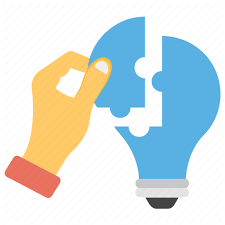
**Best Practice -** The most important part of any project is correct problem identification. Before you jump to "How to do this" part like typical Data Scientists, understand "What/Why" part.  
Understand the problem first and draft a rough strategy on a piece of paper to start with. Write down things like what are you expected to do & what data you might need or let's say what all algorithms you plan to use. 

Now the <a href="https://www.kaggle.com/c/titanic/"> Titanic challenge</a>  hosted by Kaggle is a competition in which the goal is to predict the survival or the death of a given passenger based on a set of variables describing  age, sex, or passenger's class on the boat.

![](http://www.tyro.com/content/uploads/2016/04/blog-twenty-one-business-icebergs-sink-business-280416.jpg)

So it is a classification problem and you are expected to predict Survived as 1 and Died as 0.

# What data do we have?


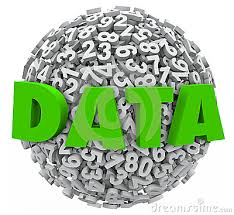


Let's import necessary libraries & bring in the datasets in Python environment first. Once we have the datasets in Python environment we can slice & dice the data to understand what we have and what is missing.

In [ ]:
# Import the basic python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style='white', context='notebook', palette='deep')
import warnings
warnings.filterwarnings('ignore')

# Read the datasets
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
IDtest = test["PassengerId"]
train.info()
test.info()

In [ ]:
train.info() # We have 891 observations & 12 columns. See the mix of variable types.

In [ ]:
test.info() # We have 417 observations & 11 columns (no response 'Survived' column).

# Exploratory data analysis
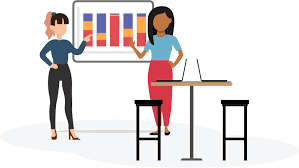



One important aspect of machine learning is to ensure that the variables show almost the same trend across train & test data. If not, it would lead to overfitting because model is representing a relationship which is not applicable in the test dataset. 

I will give you one example here. As we do variable analysis, try to replicate (wherever applicable) the code for test data and see if there is any major difference in data distribution. 

**Example** - Let's start with finding the number of missing values. If you compare the output you will see that missing value percentages do not vary much across train & test datasets.

Use the groupby/univariate/bivariate analysis method to compare the distribution across Train & Test data

In [ ]:
# Check missing values in train data set
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
miss_train = pd.DataFrame({'Train Missing Ratio' :train_na})
miss_train.head()


In [ ]:
# Check missing values in train data set
test_na = (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:30]
miss_test = pd.DataFrame({'Test Missing Ratio' :test_na})
miss_test.head()



In [ ]:
# Fill empty and NaNs values with NaN
train = train.fillna(np.nan)
test = test.fillna(np.nan)

**PassengerId**

Not relevant from modeling perspective so we will drop this variable later

**Pclass**

Pclass is categorical variable. Let's look at the distribution.

In [ ]:
# Analyze the count of survivors by Pclass
ax = sns.countplot(x="Pclass", hue="Survived", data=train)
train[['Pclass', 'Survived']].groupby(['Pclass']).count().sort_values(by='Survived', ascending=False)

# Analyze the Survival Probability by Pclass
g = sns.barplot(x="Pclass",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

Approximately 62% of Pclass = 1 passenger survived followed by 47% of Pclass2.

**Name**

Not relevant from analysis & modeling perspective. We will drop this feature later after creating a new variable as Title.

**Sex**

Based on analysis below, female had better chances of survival. 

![](https://www.ajc.com/rf/image_large/Pub/p9/AJC/2018/07/12/Images/newsEngin.22048809_071418-titanic_Titanic-Image-7--2-.jpg)

In [ ]:
# Count the number of passengers by gender
ax = sns.countplot(x="Sex", hue="Survived", data=train)
# Analyze survival count by gender
train[["Sex", "Survived"]].groupby(['Sex']).count().sort_values(by='Survived', ascending=False)

In [ ]:
# Analyze the Survival Probability by Gender
g = sns.barplot(x="Sex",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")
train[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

Based on data above, female passengers had better chances of survival than male passengers

**Age**

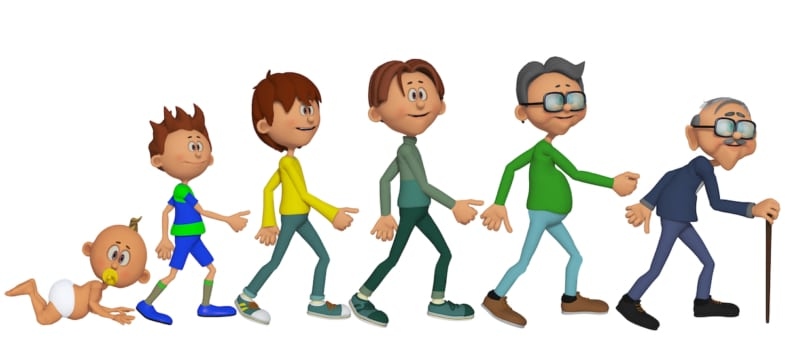
The insight below connects back to "Ladies and Kids First" scene of the movie. It shows that a good number of babies & young kids survived.

In [ ]:
# Let's explore the distribution of age by response variable (Survived)
fig = plt.figure(figsize=(10,8),)
axis = sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='Survived')
axis = sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='b',shade=True,label='Did Not Survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 20)
plt.xlabel("Passenger Age", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);

In [ ]:
sns.lmplot('Age','Survived',data=train)

# We can also say that the older the passenger the lesser the chance of survival

**SibSP**

This variable refers to number of siblings/spouse onboard. SibSP = 1 and SibSP = 2 shows higher chances of survival.

In [ ]:
# Analyze the count of survivors by SibSP

ax = sns.countplot(x="SibSp", hue="Survived", data=train)
train[['SibSp', 'Survived']].groupby(['SibSp']).count().sort_values(by='Survived', ascending=False)

In [ ]:
# Analyze probability of survival by SibSP
g  = sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
train[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

**Parch**

Parch indicates number of parents / children aboard the Titanic. Note that Parch = 3 and Parch = 1 shows higher survival probabilities. 

In [ ]:
# Analyze the count of survivors by Parch

ax = sns.countplot(x="Parch", hue="Survived", data=train)
train[['Parch', 'Survived']].groupby(['Parch']).count().sort_values(by='Survived', ascending=False)

In [ ]:
# Analyze the Survival Probability by Parch
g  = sns.factorplot(x="Parch",y="Survived",data=train,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")
train[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

**Ticket**

This variable has alphanumeric value which might not be related to Survival directly but we can use this variable to create some additional features.

In [ ]:
train['Ticket'].head()

**Fare**

Let's check the distribution first.

In [ ]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
sns.distplot(train['Fare'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Fare'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Fare distribution')

The Fare variable is right skewed. We need to transform this variable using log function and make it more normally distributed. We will do this during feature engineering process.

**Cabin**

Alphanumeric variable. 

687 missing values in train & 327 missing values in test data - which needs to be treated. We can create more features using this Cabin variable. 

In [ ]:
# Let's check the unique values
train['Cabin'].unique()

**Embarked**

C = Cherbourg, Q = Queenstown, S = Southampton

Let's explore the variable with Survival rate. Embarked represents port of embarkation. As the analysis output below suggests Emabrked C shows high probabilities of survival.

In [ ]:
# Analyze the count of survivors by Embarked variable

ax = sns.countplot(x="Embarked", hue="Survived", data=train)
train[['Embarked', 'Survived']].groupby(['Embarked']).count().sort_values(by='Survived', ascending=False)

In [ ]:
# Analyze the Survival Probability by Embarked

g  = sns.factorplot(x="Embarked",y="Survived",data=train,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
train[["Embarked", "Survived"]].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

**Additional analysis**

Let's create few additional charts to see how different variables are related.

In [ ]:
# Age, Pclass & Survival

sns.lmplot('Age','Survived',data=train,hue='Pclass')

In [ ]:
# Age, Embarked, Sex, Pclass

g = sns.catplot(x="Age", y="Embarked",  hue="Sex", row="Pclass",   data=train[train.Embarked.notnull()], 
orient="h", height=2, aspect=3, palette="Set3",  kind="violin", dodge=True, cut=0, bw=.2)

In [ ]:
# Relation among Pclass, Gender & Survival Rate

g = sns.catplot(x="Sex", y="Survived", col="Pclass", data=train, saturation=.5, kind="bar", ci=None, aspect=.6)

In [ ]:
# Relation among SibSP, Gender & Survival Rate

g = sns.catplot(x="Sex", y="Survived", col="SibSp", data=train, saturation=.5,kind="bar", ci=None, aspect=.6)

In [ ]:
# Relation among Parch, Gender & Survival Rate
g = sns.catplot(x="Sex", y="Survived", col="Parch", data=train, saturation=.5,kind="bar", ci=None, aspect=.6)

# Feature engineering
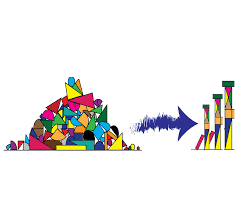



What we need to do to process following variables  - 

**PassengerID** - No action required

**PClass** - Have only 3 numerical values. We will use it as it is.

**Name** - Can be used to create new variable Title by extracting the salutation from name.

**Sex** - Create dummy variables

**Age** - Missing value treatment, followed by creating dummy variables

**SibSP** - Drop the variable

**Parch** - Drop the variable as most of the values are 0

**Ticket** - Create dummy variables post feature engineering

**Fare** - Missing value treatment followed by log normalization

**Cabin** - Create dummy variables post feature engineering

**Embarked** - Create dummy variables

In [ ]:
# Let's combining train & test for quick feature engineering. 
# Variable source is a kind of tag which indicates data source in combined data

train['source']='train'
test['source']='test'
combdata = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, combdata.shape)

**PassengerID**

In [ ]:
# PassengerID - Drop PassengerID
combdata.drop(labels = ["PassengerId"], axis = 1, inplace = True)

**Pclass**

In [ ]:
# Pclass 
combdata['Pclass'].unique()

**Name**

In [ ]:
# Name - Extract Salutation from Name variable

salutation = [i.split(",")[1].split(".")[0].strip() for i in combdata["Name"]]
combdata["Title"] = pd.Series(salutation)
combdata["Title"].value_counts()

**Title**

In [ ]:
# Name - Create 5 major categories & analyze the survival rate

combdata['Title'] = combdata['Title'].replace('Mlle', 'Miss')
combdata['Title'] = combdata['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
combdata.Title.loc[ (combdata.Title !=  'Master') & (combdata.Title !=  'Mr') & 
                   (combdata.Title !=  'Miss')  & (combdata.Title !=  'Mrs')] = 'Others'
combdata["Title"].value_counts()

In [ ]:
# inspect the correlation between Title and Survived
combdata[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

In [ ]:
# Create dummy variable 
combdata = pd.get_dummies(combdata, columns = ["Title"])

**Fare**

In [ ]:
# Fare - Check the number of missing value
combdata["Fare"].isnull().sum()

# Only 1 value is missing so we will fill the same with median
combdata["Fare"] = combdata["Fare"].fillna(combdata["Fare"].median())

# Use the numpy fuction log1p which  applies log(1+x) to all elements of the column
# combdata["Fare"] = np.log1p(combdata["Fare"])

#Check the new distribution 
# sns.distplot(combdata['Fare'] , fit=norm);

In [ ]:
# bin Fare into five intervals with equal amount of people
combdata['Fare-bin'] = pd.qcut(combdata.Fare,5,labels=[1,2,3,4,5]).astype(int)

# inspect the correlation between Fare-bin and Survived
combdata[['Fare-bin', 'Survived']].groupby(['Fare-bin'], as_index=False).mean()

**Age**

There are 2 ways of handling the missing age values.

* Fill the age with median age of similar rows according to Sex, Pclass, Parch & SibSP
* or use a quick machine learning algorithm to predict the age values based on Age, Title, Fare & SibSP

I used both of them to test which one works better. One of the code will be markdown to avoid confusion.

This section of code is for missing value treatment for age. Instead of directly replacing the missing values with the median value of complete data, the script looks for nearby data which is similar in terms of Sex, Pclass, Parch and SibSp and then takes the median values of those observations.

For example, if my salary information is missing, you can't simply replace the missing value with median salary of my whole organization. You will look for people with similar experience, type of work, department, etc and then will use the median salary of such a group.

In [ ]:
## Fill Age with the median age of similar rows according to Sex, Pclass, Parch and SibSp
# Index of NaN age rows
# missing_index = list(combdata["Age"][combdata["Age"].isnull()].index)

# for i in missing_index :
#     median_age = combdata["Age"].median()
#     filled_age = combdata["Age"][((combdata['Sex'] == combdata.iloc[i]["Sex"]) & 
#                                 (combdata['SibSp'] == combdata.iloc[i]["SibSp"]) & 
#                                 (combdata['Parch'] == combdata.iloc[i]["Parch"]) & 
#                                 (combdata['Pclass'] == combdata.iloc[i]["Pclass"]))].median()
#     if not np.isnan(filled_age) :
#         combdata['Age'].iloc[i] = filled_age
#     else :
#         combdata['Age'].iloc[i] = median_age

**2nd approach to treat the Age feature**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
combdata_temp = combdata[['Age','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Others','Fare-bin','SibSp']]

X  = combdata_temp.dropna().drop('Age', axis=1)
Y  = combdata['Age'].dropna()
holdout = combdata_temp.loc[np.isnan(combdata.Age)].drop('Age', axis=1)

regressor = RandomForestRegressor(n_estimators = 300)
#regressor = GradientBoostingRegressor(n_estimators = 500)
regressor.fit(X, Y)
y_pred = np.round(regressor.predict(holdout),1)
combdata.Age.loc[combdata.Age.isnull()] = y_pred

combdata.Age.isnull().sum(axis=0) 

In [ ]:
bins = [ 0, 4, 12, 18, 30, 50, 65, 100] # This is somewhat arbitrary...
age_index = (1,2,3,4,5,6,7)

combdata['Age-bin'] = pd.cut(combdata.Age, bins, labels=age_index).astype(int)
combdata[['Age-bin', 'Survived']].groupby(['Age-bin'],as_index=False).mean()

**Sex**

In [ ]:
# Sex - Create dummy variables
combdata["Sex"] = combdata["Sex"].map({"male": 0, "female":1}) 
# combdata = pd.get_dummies(combdata, columns = ["Sex"])

**Creating Family Size variable using SibSp & Parch**

In [ ]:
# Create a variable representing family size from SibSp and Parch
combdata["Fsize"] = combdata["SibSp"] + combdata["Parch"] + 1

# Analyze the correlation between Family and Survived
combdata[['Fsize', 'Survived']].groupby(['Fsize'], as_index=False).mean()

# Create new feature of family size
# combdata['Single'] = combdata['Fsize'].map(lambda s: 1 if s == 1 else 0)
# combdata['SmallF'] = combdata['Fsize'].map(lambda s: 1 if  s == 2  else 0)
# combdata['MedF'] = combdata['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
# combdata['LargeF'] = combdata['Fsize'].map(lambda s: 1 if s >= 5 else 0)

In [ ]:
# Analyze the Survival Probability by Fsize

combdata.Fsize = combdata.Fsize.map(lambda x: 0 if x > 4 else x)
g  = sns.factorplot(x="Fsize",y="Survived",data=combdata,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")
g = g.set_xlabels("Family Size")
combdata[["Fsize", "Survived"]].groupby(['Fsize']).mean().sort_values(by='Survived', ascending=False)

**SibSp**

In [ ]:
# SibSp - Drop the variable
combdata = combdata.drop(labels='SibSp', axis=1)

**Parch**

In [ ]:
# Parch - Drop the variable
combdata = combdata.drop(labels='Parch', axis=1)

**Ticket**

Tickets are of 2 types here.

Type 1 has only number and Type 2 is a combination of some code followed by the number. Let's extract the first digit and compare it with survival probability.

In [ ]:
# Ticket - Extracting the ticket prefix. This might be a representation of class/compartment.

combdata.Ticket = combdata.Ticket.map(lambda x: x[0])

# inspect the correlation between Ticket and Survived
combdata[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

In [ ]:
# Let's look at the number of people for each type of tickets
combdata['Ticket'].value_counts()

Most of these tickets belong to category 1, 2, 3, S, P, C. Based on value counts and average survival, we can put all other ticket categories into a new category '4'.


In [ ]:
combdata['Ticket'] = combdata['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')

# check the correlation again
combdata[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

In [ ]:
# Create dummy variables
combdata = pd.get_dummies(combdata, columns = ["Ticket"], prefix="T")

**Cabin**

In [ ]:
# Cabin - Replace the missing Cabin number by the type of cabin unknown 'U'
combdata["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'U' for i in combdata['Cabin'] ])

In [ ]:
# Let's plot the survival probability by Cabin
g  = sns.factorplot(x="Cabin",y="Survived",data=combdata,kind="bar", size = 7 ,
                    palette = "muted",order=['A','B','C','D','E','F','G','T','U'])
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [ ]:
combdata = combdata.drop(labels='Cabin', axis=1)

**Embarked**

In [ ]:
combdata = combdata.drop(labels='Embarked', axis=1)

In [ ]:
# Drop the variables we don't need

combdata =combdata.drop(labels=['Age', 'Fare', 'Name'],axis = 1)

In [ ]:
combdata.info()

# Creating a Model

In [ ]:
# Import the required libraries
from sklearn.svm import SVC
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

In [ ]:
## Separate train dataset and test dataset using the index variable 'source'

train = combdata.loc[combdata['source']=="train"]
test = combdata.loc[combdata['source']=="test"]
test.drop(labels=["Survived"],axis = 1,inplace=True)
train.drop(labels=["source"],axis = 1,inplace=True)
test.drop(labels=["source"],axis = 1,inplace=True)

# You may want to drop some variables to avoid dummy variable trap
# test.drop(labels=['source','Sex_male', 'Fsize', 'LargeF', 'SibSp_8','Parch_9','T_WEP','Cabin_T','Emb_Q'],axis = 1,inplace=True)
test.shape

In [ ]:
## Separate train features and label 

train["Survived"] = train["Survived"].astype(int)
Y_train = train["Survived"]
X_train = train.drop(labels = ["Survived"],axis = 1)

# You may want to drop some variables to avoid dummy variable trap
# X_train = train.drop(labels = ["Survived", 'Sex_male', 'Fsize', 'LargeF', 'SibSp_8','Parch_9','T_WEP','Cabin_T','Emb_Q'],axis = 1)
X_train.shape

**Cross Validation Strategy**
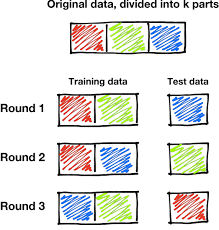

Cross Validation is one of the most powerful tool in Data Scientist's tool box. It helps you to understand the performance of your model and fight with overfitting. As we all know that Learning the model parameters and testing it on the same data is a big mistake. Such a model would have learned everything about the training data and would give result in a near perfect test score as it has already seen the data. The same model would fail terribly when tested on unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. 

The general approach is as follows:

1. Split the dataset into k groups
2. For each unique group:
        a. Kee one group as a hold out or test data set
        b. Use the remaining groups as training data set
        c. Build the model on the training set and evaluate it on the test set
        d. Save the evaluation score 
3. Summarize the performance of the model using the sample of model evaluation scores

You can access following link and read about Cross Validation in detail.

https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833
https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

In [ ]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

Now we have the training and test datasets available and we can start training the model. We will build couple of base models and then will use Grid Search method to optimize the parameters. There are several classification you can select.
We are trying following to develop a baseline - 

        1. K Nearest Neighbour
        2. Linear Discriminant Analysis
        3. Support Vector Classifier
        4. Multi-layer Perceptron classifier
        5. Extra Trees Classifier
        6. Logistic Regression
        7. Decision Trees
        8. Random Forest
        9. Gradient Boosting Classifier
        10. AdaBoost Classifier


In [ ]:
# Modeling differents algorithms. 

random_state = 2
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(SVC(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["SVC",
                                    "AdaBoost",
                                    "ExtraTrees",
                                    "KNeighboors",
                                    "DecisionTree",
                                    "RandomForest",
                                    "GradientBoosting",
                                    "LogisticRegression",
                                    "MultipleLayerPerceptron",
                                    "LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
cv_res

# Model Evaluation
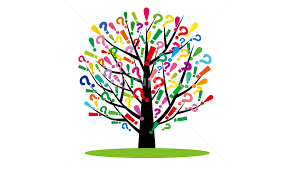



Evaluating multiple models using GridSearch optimization method. 

Hyper-parameters are key parameters that are not directly learnt within the estimators. We have to pass these as arguments. Different hyper parameters can result in different model with varying performance/accuracy. To find out what paparmeters are resulting in best score, we can use Grid Search method and use the optimum set of hyper parameters to build and select a good model.

A search consists of:

1. an estimator (regressor or classifier)
2. a parameter space;
3. a method for searching or sampling candidates;
4. a cross-validation scheme; and
5. a score function.

**AdaBoost classifier** 

Adaboost begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [ ]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                  "base_estimator__splitter" :   ["best", "random"],
                  "algorithm" : ["SAMME","SAMME.R"],
                  "n_estimators" :[1,2],
                  "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(X_train,Y_train)
ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

**ExtraTrees Classifier**

ET is a meta estimator that fits a number of randomized decision trees on various sub-samples of the dataset and then uses averaging method to improve the predictive accuracy and control over-fitting.

In [ ]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()

## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsExtC.fit(X_train,Y_train)
ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

**Random Forest Classifier**

Similar to Extra Tree Classifier a Random Forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

How ET differes from RF - 

1) When choosing variables at a split, samples are drawn from the entire training set instead of a bootstrap sample of the training set.

2) Splits are chosen completely at random from the range of values in the sample at each split.

In [ ]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

**Gradient Boosting**

Gradient boosting is one of the most powerful techniques for building predictive models. Boosting is a method of converting weak learners into strong learners by building an additive model in a forward stage-wise fashion. In boosting, each new tree is a fit on a modified version of the original data set.

In [ ]:
# Gradient boosting 
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

**Support Vector Machines**

SVM builds a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize the error. The idea behind SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

In [ ]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVMC.fit(X_train,Y_train)
SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Let's plot feature importance by various algorithms

In [ ]:
# Feature importance
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),
                     ("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [ ]:
# Concatenate all classifier results
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")

ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

**Voting Classifier**

Voting is one of the simplest method of combining the predictions from multiple machine learning models. It is not an actual classifier but a wrapper for set of different ones that are trained and valuated in parallel in order to exploit the different peculiarities of each algorithm. Here we are combining the predictions from  models that we built and predict based on votes.

In [ ]:
# Use voting classifier to combine the prediction power of all models
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, Y_train)  

In [ ]:
# Predict and export the results
test_Survived = pd.Series(votingC.predict(test), name="Survived")
results = pd.concat([IDtest,test_Survived],axis=1)
results.to_csv("Final Submission File.csv",index=False)

# Conclusion
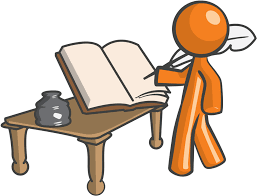



Title, Sex_Female, Fare & PClass seems to be common features preferred for classification.

While Title & Age feature represents the Age category of passengers the features like Fare, PClass, Cabin etc. represents the economic status. Based on findings we can conclude that Age, Gender & features representing social/economic status were primary factors affecting the survival of passenger.


**If you liked this notebook and found this notebook helpful, Please upvote and leave a comment**
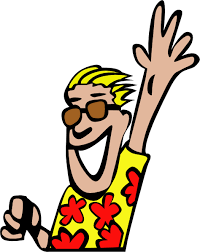